In [88]:
import numpy as np
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from ActiveLearning import classifier, GAL, GNN
import numpy.linalg as nla
import pickle
import networkx as nx
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

In [89]:
def sim_mat(X):
	X = X / nla.norm(X, axis=-1).reshape(-1, 1)
	cos_sim_mat = (X @ X.T) - np.eye(X.shape[0])
	cos_sim_mat = np.absolute(cos_sim_mat)
	return cos_sim_mat

def construct_graph(X, thresh=.8):
	cos_sim_mat = sim_mat(X)
	edges = np.vstack(np.where(cos_sim_mat > thresh))
	return edges

def GNN_embed(X, edges, gnn):
	return gnn(X, edges)
	

In [90]:
with open('dataset_q1.pkl', 'rb') as f:
	dataset = pickle.load(f)


In [91]:
K = 100

In [103]:
dataset
train_samples, train_labels = dataset['train_samples'], dataset['train_labels']
test_samples, test_labels = dataset['test_samples'], dataset['test_labels']
available_pool_samples, available_pool_labels = dataset['available_pool_samples'][:K], dataset['available_pool_labels'][:K]

In [93]:
gal = GAL(dataset, *([None] * 9))
gnn = GNN(3, 5)

In [106]:
A = gal.sim_mat(available_pool_samples)
E = gal.construct_graph(A, available_pool_samples)
# list(zip(E))
# list(zip(*E))

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_samples, train_labels)

# E[0].nodes

LogisticRegression()

In [145]:
def entropy(X):
	if not isinstance(X, torch.Tensor):
		X = torch.Tensor(X)
	ENT = (X * torch.log2(X)).sum(dim=-1)
	return ((ENT - ENT.min()) / (ENT.max() - ENT.min())).numpy()

In [146]:
entropy(model.predict_proba(available_pool_samples))

array([0.02770976, 0.36571267, 0.2965373 , 0.1343723 , 0.2663088 ,
       0.27757296, 0.25988862, 0.24987043, 0.2503351 , 0.3937323 ,
       0.8317455 , 0.11611172, 0.30766532, 0.01233779, 0.23135301,
       0.22221288, 0.00235588, 0.38634858, 0.03509686, 0.40216392,
       0.44802266, 0.31799737, 0.4043687 , 0.11227578, 0.3119649 ,
       0.09911615, 0.16669632, 0.87662226, 0.8416791 , 0.2865192 ,
       0.27681932, 0.5042237 , 0.8923062 , 0.27591595, 0.17103204,
       0.15235597, 0.3640711 , 0.35174826, 0.47982508, 0.00550184,
       0.29467463, 0.78556854, 0.32180837, 0.48296684, 0.7131249 ,
       0.06050777, 0.35489133, 0.1668901 , 0.04153618, 0.51532465,
       0.32260105, 0.07401264, 0.49864092, 0.26473552, 0.39236325,
       0.3847823 , 0.3682349 , 0.4559444 , 0.64426494, 0.08773135,
       0.01072461, 0.10052178, 0.3436467 , 0.24360234, 0.19020337,
       0.1608949 , 0.3050408 , 0.296874  , 0.4830924 , 0.45269516,
       0.8771004 , 0.651721  , 0.16537498, 0.04331754, 0.20265

In [147]:
ENT_DICT = dict(zip(range(len(available_pool_samples)), entropy(model.predict_proba(available_pool_samples))))
PR_DICT = nx.pagerank(E[0])

In [148]:
s = {}
for k in ENT_DICT.keys():
	s[k] = ENT_DICT[k] + PR_DICT[k] 
s

{0: 0.039797072310894105,
 1: 0.374227430884533,
 2: 0.3091896640826832,
 3: 0.14434726913312795,
 4: 0.2736949812915539,
 5: 0.28541879942260534,
 6: 0.2677266680474973,
 7: 0.26181701261805057,
 8: 0.2609087014653809,
 9: 0.40284777863580173,
 10: 0.8419118687276225,
 11: 0.12537673982603662,
 12: 0.31650463333833295,
 13: 0.023199099274584217,
 14: 0.24338577666277766,
 15: 0.2293392794290445,
 16: 0.008614966608656665,
 17: 0.3989410959210201,
 18: 0.046645061775720455,
 19: 0.4131152181554745,
 20: 0.45618779271327425,
 21: 0.3267708743635868,
 22: 0.41574872135104696,
 23: 0.12237344028384094,
 24: 0.3212812663843119,
 25: 0.11009093468534054,
 26: 0.1788943994807612,
 27: 0.8864626997374253,
 28: 0.850447822801201,
 29: 0.29953129614873003,
 30: 0.2859199785035344,
 31: 0.51261578709594,
 32: 0.8995970522118433,
 33: 0.2873518305650337,
 34: 0.18000151565455355,
 35: 0.16201907571289975,
 36: 0.3758655325152004,
 37: 0.3604456267165948,
 38: 0.48768902078175,
 39: 0.015701251198

In [112]:
nx.pagerank(E[0])

{0: 0.012087314401715371,
 1: 0.00851475841253287,
 2: 0.012652354197658202,
 3: 0.00997497518400077,
 4: 0.007386167004368234,
 5: 0.007845839761121584,
 6: 0.00783804886300327,
 7: 0.011946578214631094,
 8: 0.010573604152453647,
 9: 0.009115469294371096,
 10: 0.010166363394675682,
 11: 0.009265021707845843,
 12: 0.008839315087676804,
 13: 0.01086130940378563,
 14: 0.012032761955212364,
 15: 0.007126398579206248,
 16: 0.006259086504651327,
 17: 0.012592520567397696,
 18: 0.011548204078948831,
 19: 0.010951295368761816,
 20: 0.008165129119981991,
 21: 0.008773508173630129,
 22: 0.011380022754092608,
 23: 0.010097661036556996,
 24: 0.009316367082782993,
 25: 0.010974780670276301,
 26: 0.012198074536265046,
 27: 0.009840440120573543,
 28: 0.008768726579277172,
 29: 0.013012096538973544,
 30: 0.009100659970590669,
 31: 0.008392082757866319,
 32: 0.007290843601308644,
 33: 0.011435880028305796,
 34: 0.00896947434328952,
 35: 0.00966310676072081,
 36: 0.011794431564959296,
 37: 0.0086973688

In [76]:
D_samples = np.concatenate([train_samples, available_pool_samples], axis=0)
D_labels = np.concatenate([train_labels, available_pool_labels], axis=0)
gnn_labeled_idx = list(range(len(train_samples)))

A = gal.sim_metric(D_samples)
D_gnn, E_gnn = gal.construct_graph(A, D_samples)

D_samples_torch = torch.Tensor(D_samples)
E_gnn_torch = torch.tensor(E_gnn)
D_embed = gnn(D_samples_torch, E_gnn_torch)
# D_embed


In [87]:
x = torch.rand(2, 3)
x_emb = torch.rand(2, 5)
print(x, x_emb)
torch.cat([x, x_emb], dim=1)

tensor([[0.0940, 0.4626, 0.6913],
        [0.3707, 0.2501, 0.2215]]) tensor([[0.2747, 0.4428, 0.8646, 0.9192, 0.8501],
        [0.2946, 0.3140, 0.9503, 0.1737, 0.7815]])


tensor([[0.0940, 0.4626, 0.6913, 0.2747, 0.4428, 0.8646, 0.9192, 0.8501],
        [0.3707, 0.2501, 0.2215, 0.2946, 0.3140, 0.9503, 0.1737, 0.7815]])

In [78]:
V = available_pool_samples
A = gal.sim_mat(V)

G, E = gal.construct_graph(A, V)

V = torch.Tensor(V)
E = torch.tensor(E)

U_idx = gal.select_points(G)
gnn_labeled_idx.extend([e + len(train_samples) for e in U_idx])

gal.label_update(U_idx)
gnn.train(gnn_labeled_idx)
model.train()



In [82]:
gnn_labeled_idx.extend([e + len(train_samples) for e in U_idx])

In [74]:
# gnn_labeled_idx

In [23]:

E

tensor([[ 0,  0,  0,  ..., 99, 99, 99],
        [13, 19, 23,  ..., 65, 76, 86]])

In [26]:
gnn(V, E)[U_idx]

tensor([[ 0.0050,  0.0275, -0.3487, -0.2231,  0.0398],
        [-0.2862,  1.0663, -0.6296, -0.6840, -1.3012],
        [-0.5214, -0.7363, -1.1806, -0.1200, -0.9648],
        [-0.3437,  0.9748, -0.8231, -0.8689, -1.2370],
        [-0.6906, -0.7724, -0.5473, -0.1646,  0.8456],
        [-0.2551,  1.4601, -0.7006, -0.8703, -1.6027],
        [-0.7653, -0.4122, -0.8013, -0.3250, -0.6446],
        [-0.7098, -0.2912, -0.8292, -0.4212, -0.5222],
        [-1.5224, -0.5598, -1.1816, -1.3319,  1.8013],
        [ 0.6572,  1.0351, -0.5313, -0.0398, -1.9848]],
       grad_fn=<IndexBackward0>)

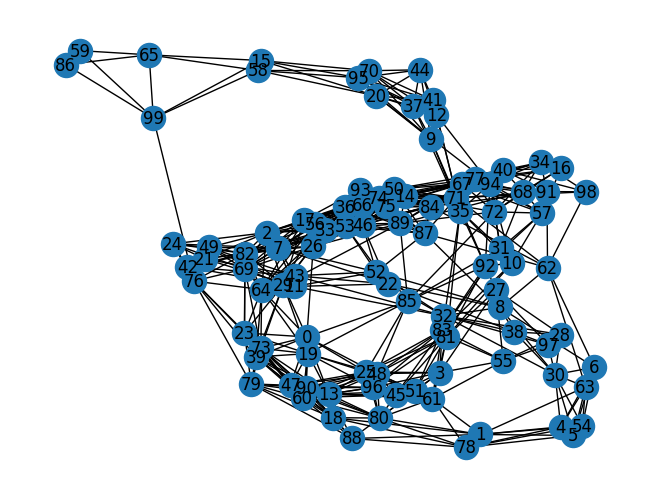

In [47]:

nx.draw(G, with_labels=True)
U_idx = gal.select_points(G)
# V_emb = gnn(V, E)[U_idx]
gal.label_update(U_idx)
# gal._train_model()


# R = gal.unceartinty_score(G)
# R


In [15]:
MAT = [
	[0, 1, 0],
	[1, 0, 0],
	[0, -2, 0]
]

pairwise_distances(MAT, MAT)
# sim_mat(MAT)

array([[0.        , 1.41421356, 3.        ],
       [1.41421356, 0.        , 2.23606798],
       [3.        , 2.23606798, 0.        ]])

In [48]:
pairwise_distances(available_pool_samples[:100], available_pool_samples[:100], metric='cosine')
# A

array([[1.11022302e-16, 4.25210919e-01, 2.48088128e-01, ...,
        8.78973505e-01, 1.20134908e+00, 5.08608569e-01],
       [4.25210919e-01, 0.00000000e+00, 9.40942022e-01, ...,
        3.38068232e-01, 3.39233968e-01, 4.51882605e-01],
       [2.48088128e-01, 9.40942022e-01, 1.11022302e-16, ...,
        1.56248148e+00, 1.46841709e+00, 3.93760320e-01],
       ...,
       [8.78973505e-01, 3.38068232e-01, 1.56248148e+00, ...,
        0.00000000e+00, 5.02453665e-01, 1.25441868e+00],
       [1.20134908e+00, 3.39233968e-01, 1.46841709e+00, ...,
        5.02453665e-01, 0.00000000e+00, 5.94533463e-01],
       [5.08608569e-01, 4.51882605e-01, 3.93760320e-01, ...,
        1.25441868e+00, 5.94533463e-01, 0.00000000e+00]])

In [7]:
sim_mat(train_samples).round(1)

array([[0. , 0.5, 0.6, 0.7, 0.6, 0.2, 0.7, 0.5, 0.3, 0.9],
       [0.5, 0. , 1. , 0.9, 1. , 0.9, 0.3, 0.9, 0. , 0.8],
       [0.6, 1. , 0. , 0.9, 1. , 0.9, 0.1, 0.9, 0.1, 0.9],
       [0.7, 0.9, 0.9, 0. , 0.9, 0.8, 0.1, 1. , 0.5, 0.9],
       [0.6, 1. , 1. , 0.9, 0. , 0.9, 0.1, 0.9, 0. , 0.9],
       [0.2, 0.9, 0.9, 0.8, 0.9, 0. , 0.5, 0.9, 0. , 0.6],
       [0.7, 0.3, 0.1, 0.1, 0.1, 0.5, 0. , 0.1, 0.4, 0.3],
       [0.5, 0.9, 0.9, 1. , 0.9, 0.9, 0.1, 0. , 0.4, 0.8],
       [0.3, 0. , 0.1, 0.5, 0. , 0. , 0.4, 0.4, 0. , 0.3],
       [0.9, 0.8, 0.9, 0.9, 0.9, 0.6, 0.3, 0.8, 0.3, 0. ]])

({0: 0.03943355049943057,
  1: 0.13950540985350232,
  2: 0.13950540985350232,
  3: 0.11848693265458134,
  4: 0.13950540985350232,
  5: 0.09712567131989187,
  6: 0.018072289164741105,
  7: 0.13950540985350232,
  8: 0.018072289164741105,
  9: 0.15078762778260463},
 [9, 1, 2, 4, 7])

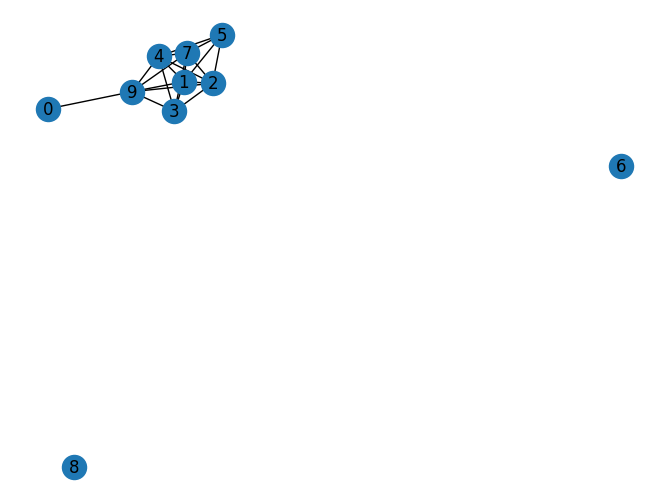

In [15]:
# construct_graph(train_samples)
# train_samples
G = nx.Graph()
for i, e in enumerate(gal.train_samples):
	G.add_node(i, label=','.join(map(lambda x: str(round(x, 2)), e)))

edges = sim_mat(train_samples)
edges = np.vstack(np.where(edges > .8))

for e in edges.T:
	G.add_edge(*e)

nx.draw(G, with_labels=True)

# nx.degree_centrality(G)
R = nx.pagerank(G)
# print(R)
D = sorted(R, key=lambda x: R[x], reverse=True)[:5]
R, D

In [4]:
model = classifier(2, 3)

In [3]:
hasattr(model, 'forward')

True

In [7]:
# dir(model).__contains__('forward')

True

In [12]:
callable(model.register_backward_hook)

False

In [2]:
model = classifier(2, 3)

In [3]:
cluster_means = [(7, 3), (1, 1), (6, 10)]
ppc = 30
X = np.vstack([np.random.normal(c, np.random.random(), size=(ppc, 2)) for c in cluster_means])
X = torch.tensor(X).type(torch.float)
Y = torch.cat([(torch.ones(ppc) * i) for i in range(len(cluster_means))]).reshape(-1, 1).type(torch.long)
# print(X, Y)


In [4]:
Y.reshape(-1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

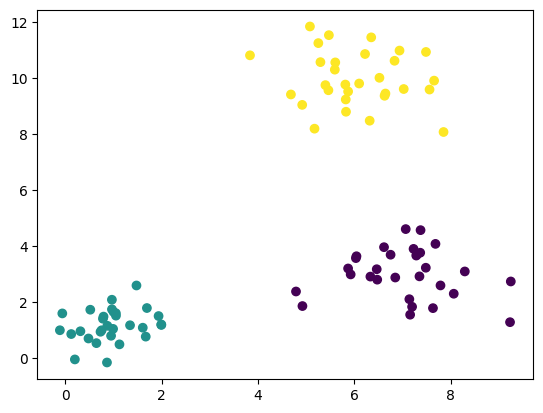

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1))

In [6]:
o = model(X)
o

tensor([[ 0.2420, -0.3387,  0.5341],
        [ 0.2482, -0.4054,  0.6402],
        [ 0.1993, -0.3821,  0.6429],
        [ 0.2695, -0.3836,  0.6166],
        [ 0.2711, -0.3185,  0.5092],
        [ 0.2332, -0.4473,  0.8005],
        [ 0.2399, -0.4524,  0.7183],
        [ 0.2273, -0.4785,  0.7949],
        [ 0.3051, -0.3968,  0.6184],
        [ 0.2715, -0.3873,  0.6218],
        [ 0.3118, -0.3845,  0.5966],
        [ 0.2218, -0.4192,  0.6706],
        [ 0.2365, -0.3723,  0.5832],
        [ 0.2365, -0.4011,  0.6310],
        [ 0.2327, -0.2559,  0.3992],
        [ 0.1921, -0.3584,  0.6031],
        [ 0.2560, -0.3066,  0.4937],
        [ 0.2118, -0.4158,  0.6865],
        [ 0.2050, -0.3734,  0.6043],
        [ 0.2014, -0.2660,  0.4025],
        [ 0.2548, -0.3430,  0.5474],
        [ 0.2751, -0.3201,  0.5108],
        [ 0.2506, -0.3131,  0.4989],
        [ 0.2687, -0.3527,  0.5658],
        [ 0.2687, -0.3836,  0.6166],
        [ 0.2354, -0.3503,  0.5479],
        [ 0.2844, -0.3514,  0.5570],
 

In [7]:
lr = .001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [8]:
EPOCHS = 5
model.train()

for epoch in range(EPOCHS):

	total_loss = 0
	for x, y in zip(X, Y):
	
		o = model(x.unsqueeze(dim=0))

		loss = criterion(o, y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	print(f'[{epoch + 1} / {EPOCHS}]: loss - {total_loss / len(X)}')




[1 / 5]: loss - 1.240002955048759
[2 / 5]: loss - 0.6472085892956885
[3 / 5]: loss - 0.27442649410384345
[4 / 5]: loss - 0.08976981850121067
[5 / 5]: loss - 0.0327865674373849


In [9]:
model.predict(X[61])

tensor([5.6382e-05, 8.0524e-05, 9.9986e-01], grad_fn=<SoftmaxBackward0>)

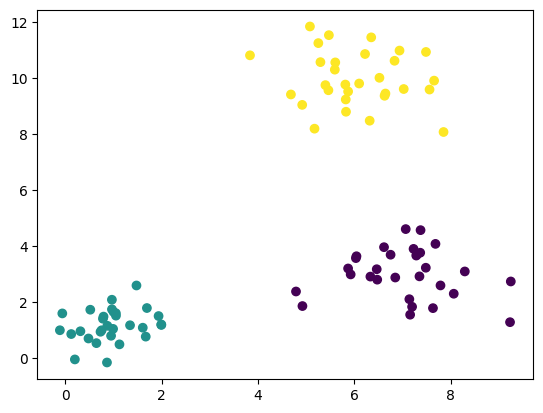

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X).argmax(dim=-1))

Iteration 1/40
Accuracy: 0.56
----------------------------------------
Iteration 2/40
Accuracy: 0.643
----------------------------------------
Iteration 3/40
Accuracy: 0.678
----------------------------------------
Iteration 4/40
Accuracy: 0.687
----------------------------------------
Iteration 5/40
Accuracy: 0.694
----------------------------------------
Iteration 6/40
Accuracy: 0.695
----------------------------------------
Iteration 7/40
Accuracy: 0.695
----------------------------------------
Iteration 8/40
Accuracy: 0.696
----------------------------------------
Iteration 9/40
Accuracy: 0.696
----------------------------------------
Iteration 10/40
Accuracy: 0.699
----------------------------------------
Iteration 11/40
Accuracy: 0.698
----------------------------------------
Iteration 12/40
Accuracy: 0.698
----------------------------------------
Iteration 13/40
Accuracy: 0.698
----------------------------------------
Iteration 14/40
Accuracy: 0.698
-----------------------------

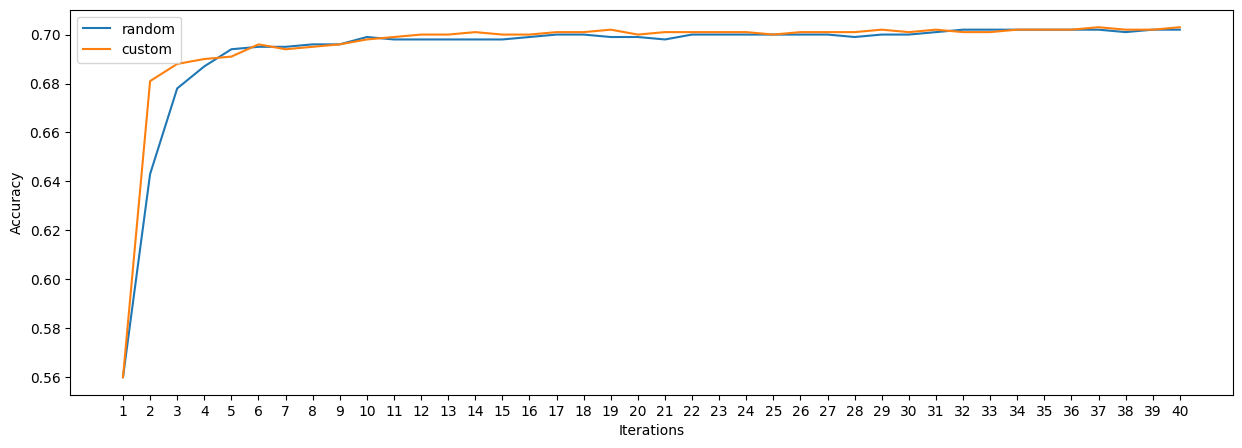

In [11]:
import pickle
from collections import defaultdict
from ActiveLearning import ActiveLearningPipeline, generate_plot

with open('dataset_q1.pkl', 'rb') as f:
	dataset = pickle.load(f)

iterations = 40
budget_per_iter = 50
train_limit = 2010
selection_criteria = ['random', 'custom']
accuracy_scores_dict = defaultdict(list)
for criterion in selection_criteria:
	AL_class = ActiveLearningPipeline(dataset=dataset,
									selection_criterion=criterion,
									iterations=iterations,
									budget_per_iter=budget_per_iter,
									train_limit=train_limit)
	accuracy_scores_dict[criterion] = AL_class.run_pipeline()
generate_plot(accuracy_scores_dict)

[]

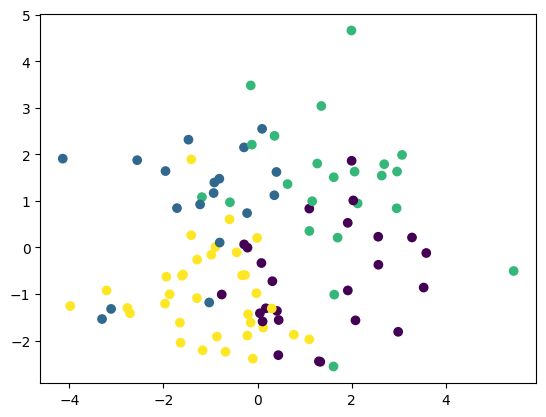

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy.linalg as nla

pca = PCA(n_components=2)
X = pca.fit_transform(dataset['available_pool_samples'])
Y = dataset['available_pool_labels']

plt.scatter(X[:100, 0], X[:100, 1], c=Y[:100])
plt.plot()


In [51]:
A = dataset['available_pool_samples'][:100]
A = A / nla.norm(A, axis=-1).reshape(-1, 1)
A

array([[-0.83025965,  0.55406814,  0.06064164],
       [-0.63636578,  0.16625934, -0.75325721],
       [-0.28689388,  0.8877776 ,  0.3599206 ],
       [-0.91985112,  0.00731191, -0.39219951],
       [ 0.5212115 , -0.01698809,  0.85325845],
       [ 0.49364969,  0.091469  ,  0.86483722],
       [-0.35511163, -0.16661742, -0.91985562],
       [-0.18443254,  0.91065485,  0.36971932],
       [ 0.16897057,  0.5390062 ,  0.82517953],
       [-0.79705345, -0.60390635,  0.00170865],
       [ 0.96173567,  0.17117078, -0.21392773],
       [ 0.20478587,  0.89349649,  0.39965832],
       [-0.77198166, -0.61395099,  0.16464659],
       [-0.79829452,  0.47102716, -0.37531224],
       [ 0.54535193, -0.49125072, -0.6791642 ],
       [-0.36663904, -0.75667374,  0.54131383],
       [-0.62244504, -0.12829065,  0.77207751],
       [-0.40613914,  0.81657216,  0.41019619],
       [-0.673469  ,  0.50138813, -0.54318455],
       [ 0.8296446 , -0.55519693,  0.0587044 ],
       [ 0.68857768,  0.63877465, -0.343

In [59]:
# cos_sim_mat = D @ D.T
cos_sim_mat = (A @ A.T) - np.eye(A.shape[0])

In [54]:
sorted_sim = np.sort(cos_sim_mat, axis=1)[:, -2::-1]

In [61]:
thresh = .8
edges = np.where(cos_sim_mat > thresh)

array([[ 0,  0,  0, ..., 99, 99, 99],
       [13, 17, 18, ..., 76, 79, 95]], dtype=int64)